In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import csv
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_and_preprocess_data(file_path, chunk_size):
    """
    Loads time series data from a text file, creates overlapping sequences,
    and splits the data into training and testing sets.

    Args:
        file_path (str): Path to the text file containing the data.
        chunk_size (int): The number of time steps in each input sequence.
        test_size (float, optional): Proportion of data to use for testing (default: 0.2).
        shuffle (bool, optional): Whether to shuffle the data before splitting (default: False).

    Returns:
        X_train (numpy.ndarray): Training input sequences (3D array).
        X_test (numpy.ndarray): Testing input sequences (3D array).
        y_train (numpy.ndarray): Training target values (2D array).
        y_test (numpy.ndarray): Testing target values (2D array).
    """
    # Load data
    data = np.loadtxt(file_path, delimiter=',')  # Adjust delimiter if needed

    # Create overlapping sequences
    X, y = [], []
    for i in range(len(data) - chunk_size):
        X.append(data[i : i + chunk_size])
        y.append(data[i + chunk_size])
    X = np.array(X)
    y = np.array(y)

    print(f"Initial shape of X: {X.shape}")  # Debugging statement
    print(f"Initial shape of y: {y.shape}")  # Debugging statement

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test
file_path = r"D:\Studies\Summer 2024 research\small.tgz\small\fluorescence_iNet1_Size100_CC03inh.txt"
chunk_size = 10

X_train, X_test, y_train, y_test = load_and_preprocess_data(file_path, chunk_size)



Initial shape of X: (179488, 10, 100)
Initial shape of y: (179488, 100)


C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100)            │        60,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,700 (276.17 KB)

 Trainable params: 70,700 (276.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - loss: 0.0034
Epoch 2/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 57s 13ms/step - loss: 0.0017
Epoch 3/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 61s 14ms/step - loss: 0.0015
Epoch 4/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 56s 13ms/step - loss: 0.0015
Epoch 5/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - loss: 0.0015
Epoch 6/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - loss: 0.0015
Epoch 7/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0015
Epoch 8/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 49s 11ms/step - loss: 0.0014
Epoch 9/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 0.0014
Epoch 10/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - loss: 0.0014
Epoch 11/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.0014
Epoch 12/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 0.0014
Epoch 13/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0014
Epoch 14/20
4488/4488 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 0.0014
Epoch 15/

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


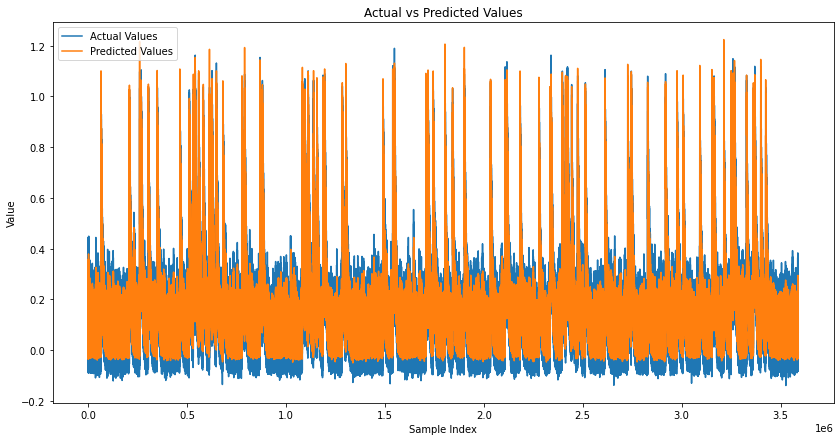

In [3]:
# Define the GRU model
model = Sequential()
model.add(GRU(units=100, input_shape=(chunk_size, X_train.shape[2])))  # input_shape is (timesteps, features per time step, which in this case must be 1)
model.add(Dense(units=y_train.shape[1]))  # Output layer should match y_train's second dimension

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()

# Train the model without validation split
model.fit(X_train, y_train, epochs=20, batch_size=32)  # Adjust epochs and batch_size as needed

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.flatten(), label='Actual Values')
plt.plot(y_pred.flatten(), label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²) Score: {r2}')

Mean Absolute Error (MAE): 0.028721366080596025
Mean Squared Error (MSE): 0.0014106963091434807
Root Mean Squared Error (RMSE): 0.03755923733442255
R-squared (R²) Score: 0.9548448118196338


In [7]:
# Save the weights of the GRU model to a CSV file
gru_weights = model.layers[0].get_weights()

# Kernel weights for the new memory content (W_h)
W_h = gru_weights[0][:, 2 * 100:]  # Assuming 100 units and 3 gates

# Specify the file path to save the weights CSV
weights_file = 'gru_W_h_weights.csv'

# Save weights to CSV
with open(weights_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(W_h)

print(f"GRU W_h weights saved to {weights_file}")

GRU W_h weights saved to gru_W_h_weights.csv


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Load and Prepare True Network Data
true_network_file = r"D:\Studies\Summer 2024 research\small.tgz\small\network_iNet1_Size100_CC03inh.txt"
true_network = np.loadtxt(true_network_file, delimiter=',')

# 2. Load Your Weight Matrix
weight_matrix_file = r"C:\Users\Acer\gru_W_h_weights.csv"
weight_matrix_df = pd.read_csv(weight_matrix_file)

# Convert the DataFrame to a NumPy array if needed
weight_matrix = weight_matrix_df.values

# Boolean indexing to filter out rows where the third element is -1
filtered_true_network = true_network[true_network[:, 2] != -1]

# Check the shape of the DataFrame
num_rows, num_cols = weight_matrix_df.shape

matrix_ij = []
for element in filtered_true_network:
    row_index = int(element[0]) - 2  #fixing indexing as elements appeared 2 off from desired location for rows and 1 off for columns
    col_index = int(element[1]) - 1
    
    # Print the indices and check if they are within bounds
    print(f"Row index: {row_index+2}, Column index: {col_index+1}")
    
    if row_index < num_rows and col_index < num_cols:
        matrix_ij.append(weight_matrix_df.iloc[row_index, col_index])
    else:
        print(f"Index out of bounds: Row index {row_index+2}, Column index {col_index+1}")

print(matrix_ij)


Row index: 33, Column index: 1
Row index: 47, Column index: 1
Row index: 55, Column index: 1
Row index: 59, Column index: 1
Row index: 71, Column index: 1
Row index: 13, Column index: 2
Row index: 20, Column index: 2
Row index: 36, Column index: 2
Row index: 52, Column index: 2
Row index: 61, Column index: 2
Row index: 77, Column index: 2
Row index: 88, Column index: 2
Row index: 4, Column index: 3
Row index: 13, Column index: 3
Row index: 20, Column index: 3
Row index: 29, Column index: 3
Row index: 35, Column index: 3
Row index: 40, Column index: 3
Row index: 53, Column index: 3
Row index: 77, Column index: 3
Row index: 86, Column index: 3
Row index: 88, Column index: 3
Row index: 91, Column index: 3
Row index: 11, Column index: 4
Row index: 35, Column index: 4
Row index: 54, Column index: 4
Row index: 67, Column index: 4
Row index: 72, Column index: 4
Row index: 81, Column index: 4
Row index: 85, Column index: 4
Row index: 11, Column index: 5
Row index: 14, Column index: 5
Row index

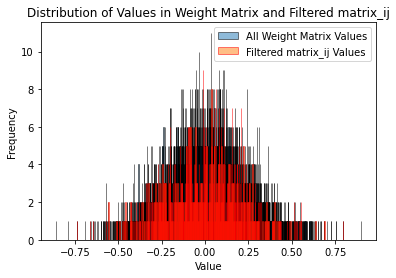

In [30]:
# Flatten the weight matrix to get all values
all_values = weight_matrix_df.values.flatten()

# Plot the distribution of all values in weight_matrix_df
plt.hist(all_values, bins=len(all_values), edgecolor='black', alpha=0.5, label='All Weight Matrix Values')

# Plot the distribution of matrix_ij values
plt.hist(matrix_ij, bins=len(matrix_ij), edgecolor='red', alpha=0.5, label='Filtered matrix_ij Values')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Weight Matrix and Filtered matrix_ij')

# Add legend
plt.legend()

# Show plot
plt.show()

In [36]:
from scipy import stats
print(np.mean(matrix_ij))
print(np.median(matrix_ij))
print(np.max(matrix_ij))
print(np.min(matrix_ij))
print(np.ptp(matrix_ij))

-0.0047965045360663155
0.0004458790085
0.7945851
-0.7410992
1.5356843


In [40]:
count = 0
for element in matrix_ij:
    if element < 0.5 and element > -0.5:
        count += 1
        
print(f"percentage of true connections that lie within -0.5 to 0.5 is {(count/len(matrix_ij))*100}")
        
        

percentage of true connections that lie within -0.5 to 0.5 is 97.89473684210527
